In [41]:
import pandas as pd
import numpy as np

In [112]:
df = pd.read_csv('train.csv', encoding='utf-8-sig')

df = df.drop(['신고인부호','수입자부호','해외거래처부호','특송업체부호', '신고일자', '관세율구분코드'], axis=1)

In [113]:
#수입통관계획코드 label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입통관계획코드'] = l_e_df
df['수입통관계획코드'].unique()

#수입신고구분코드 label encoding
label = df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['수입신고구분코드'] = l_e_df

#적출국가코드 label encoding
le = LabelEncoder()
label = df['적출국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['적출국가코드'] = l_e_df

#원산지국가코드 label encoding
le = LabelEncoder()
label = df['원산지국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
df['원산지국가코드'] = l_e_df

df['과세가격원화금액']=df['과세가격원화금액'].astype(int)
df['신고중량(KG)'] = np.log(df['신고중량(KG)'])

In [114]:
df.sample(3)

,신고번호,통관지세관부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,우범여부,핵심적발
2844,355836,40,2,0,11,21,18,6.583824,671869,40,4077063,8443130000,38,46,8.0,0,0
37392,443129,40,0,1,11,21,11,8.452996,32199,10,2002079,2106909099,81,95,8.0,0,0
17847,368499,10,2,1,15,21,11,5.629777,66395,10,4002001,710809000,15,19,27.0,0,0


In [115]:
#표준화
from sklearn.preprocessing import StandardScaler

sdscaler=StandardScaler()
sdscaler=sdscaler.fit(df)

df_scaled=sdscaler.transform(df)

df_df_scaled=pd.DataFrame(data=df_scaled,columns=c1)



#정규화
from sklearn.preprocessing import MinMaxScaler

mMscaler= MinMaxScaler()
mMscaler=mMscaler.fit(df_df_scaled)

df_scaled=mMscaler.transform(df_df_scaled)

df_df_scaled=pd.DataFrame(data=df_scaled,columns=c1)
df_df_scaled['우범여부']=df['우범여부']

In [116]:
from lightgbm import LGBMClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [107]:
c1=['신고번호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
   '운송수단유형코드','반입보세구역부호','HS10단위부호','적출국가코드',
  '원산지국가코드','관세율','우범여부','핵심적발']

c2=['신고번호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
   '운송수단유형코드','반입보세구역부호','HS10단위부호','적출국가코드',
  '원산지국가코드','관세율','우범여부']

c3=['신고번호','통관지세관부호','수입통관계획코드', '수입신고구분코드',
   '수입거래구분코드','수입종류코드','징수형태코드','신고중량(KG)','과세가격원화금액',
   '운송수단유형코드','반입보세구역부호','HS10단위부호','적출국가코드',
  '원산지국가코드','관세율']

In [108]:
X = np.array(pd.DataFrame(df, columns=c3))  #우범여부X, 핵심적발X
X1 = np.array(pd.DataFrame(df, columns=c2)) #우범여부O, 핵심적발X --> 우범여부 고려해서 핵심적발
Y_1 = np.array(pd.DataFrame(df, columns=['우범여부']))
Y_2 = np.array(pd.DataFrame(df, columns=['핵심적발']))

In [109]:
#데이터 분할_우범여부
X_train, X_test, y1_train, y1_test = train_test_split(X, Y_1, test_size=0.2, random_state=11)

#앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y1_test)]
lgbm_wrapper.fit(X_train, y1_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

C:\Users\82108\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	valid_0's binary_logloss: 0.511642
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.502371
[3]	valid_0's binary_logloss: 0.495094
[4]	valid_0's binary_logloss: 0.488759
[5]	valid_0's binary_logloss: 0.483513
[6]	valid_0's binary_logloss: 0.478725
[7]	valid_0's binary_logloss: 0.47477
[8]	valid_0's binary_logloss: 0.471302
[9]	valid_0's binary_logloss: 0.46822
[10]	valid_0's binary_logloss: 0.465702
[11]	valid_0's binary_logloss: 0.463236
[12]	valid_0's binary_logloss: 0.460872
[13]	valid_0's binary_logloss: 0.458812
[14]	valid_0's binary_logloss: 0.457203
[15]	valid_0's binary_logloss: 0.455628
[16]	valid_0's binary_logloss: 0.454152
[17]	valid_0's binary_logloss: 0.452373
[18]	valid_0's binary_logloss: 0.450944
[19]	valid_0's binary_logloss: 0.44972
[20]	valid_0's binary_logloss: 0.448567
[21]	valid_0's binary_logloss: 0.447472
[22]	valid_0's binary_logloss: 0.446573
[23]	valid_0's binary_logloss: 0.445301
[24]	valid_0's binary_logloss:

In [111]:
#데이터 분할_g
X1_train, X1_test, y2_train, y2_test = train_test_split(X1, Y_2, test_size=0.2, random_state=11)

#앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper2 = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X1_test, y2_test)]
lgbm_wrapper2.fit(X1_train, y2_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds2 = lgbm_wrapper2.predict(X1_test)
pred_proba2 = lgbm_wrapper2.predict_proba(X1_test)[:,1]

ValueError: Unknown label type: 'continuous'

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y1_test, preds, pred_proba)

오차 행렬
[[13382   654]
 [ 3041   847]]
정확도: 0.7939, 정밀도: 0.5643, 재현율: 0.2178,     F1: 0.3143, AUC: 0.7836


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

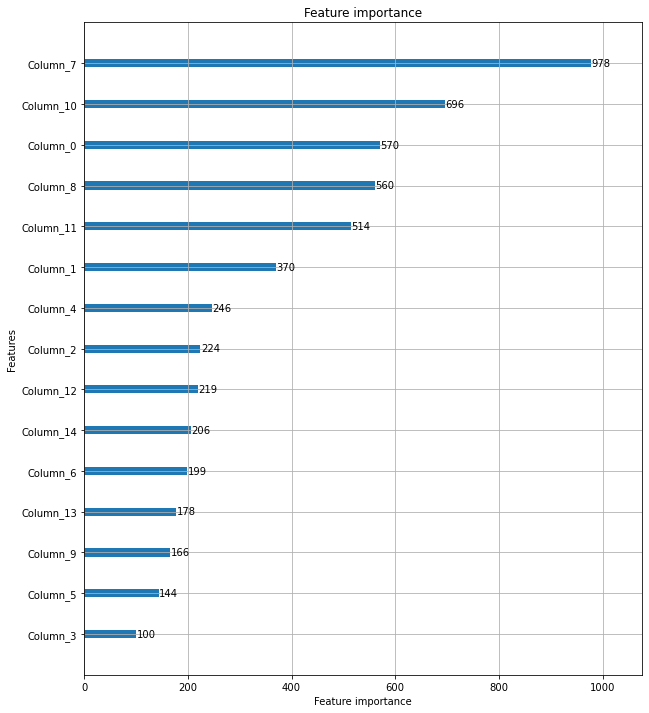

In [94]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## test.csv

In [72]:
t_df = pd.read_csv('test.csv')


#신고일자, 해외거래처부호, 특송업체부호 삭제
t_df = t_df.drop(['신고인부호','수입자부호','해외거래처부호','특송업체부호', '관세율구분코드'], axis=1)

In [73]:
#수입통관계획코드, 수입신고구분코드 label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = t_df['수입통관계획코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['수입통관계획코드'] = l_e_df

label = t_df['수입신고구분코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['수입신고구분코드'] = l_e_df

#적출국가코드 label encoding
le = LabelEncoder()
label = t_df['적출국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['적출국가코드'] = l_e_df

#원산지국가코드 label encoding
le = LabelEncoder()
label = t_df['원산지국가코드']
le.fit(label)
label_encoded = le.transform(label)
l_e_df = pd.DataFrame(label_encoded, columns=['label_encoded'])
t_df['원산지국가코드'] = l_e_df

#신고일자
t_df['신고일자'] = pd.to_datetime(t_df['신고일자'])
t_df.insert(1, '신고일자_월', t_df['신고일자'].dt.month)
t_df = t_df.drop('신고일자', axis=1)

t_df['과세가격원화금액']=t_df['과세가격원화금액'].astype(int)
t_df['신고중량(KG)'] = np.log(t_df['신고중량(KG)'])

In [74]:
X1_test = np.array(pd.DataFrame(t_df, columns = c3)) #t_df에 우범여부X, 핵심적발X ==> c3
t_dt_prediction_1 = lgbm_wrapper.predict(X1_test)

t_df['우범여부']=t_dt_prediction_1 #예측한 우범여부 t_df에 추가

X2_test = np.array(pd.DataFrame(t_df, columns = c2)) #t_df에 우범여부O, 핵심적발X ==> c2
t_dt_prediction_2 = lgbm_wrapper2.predict(X2_test)

In [75]:
test_result = pd.DataFrame()
test_result['신고번호'] = t_df['신고번호']
test_result['우범여부'] = t_dt_prediction_1
test_result['핵심적발'] = t_dt_prediction_2

test_result

,신고번호,우범여부,핵심적발
0,982834,0,0
1,828961,0,0
2,522066,0,0
3,999547,0,0
4,919320,0,0
...,...,...,...
10268,857321,1,1
10269,621501,1,2
10270,998367,1,1
10271,697376,0,0


In [76]:
test_result['핵심적발'].unique()

array([0, 2, 1], dtype=int64)